In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysentani as sti

In [12]:
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')

In [13]:
# pysentani access type function
survey['access_type'] = sti.access_type(survey)

In [14]:
# selecting only demand points that are households (is this bad form?)
survey = survey[survey['demand_point'] == 'household']

* Creating a function definition (calc_willingness): app_now_appliance is a household who currently owns the appliance, app_buy_appliance is a household who wants to buy the appliance. Each survey response is assigned a boolean value. In survey[appliance], the bitwise operator (~) is used to switch true and false values which makes households who do not own the appliance true and now only responses that are both true are evaluated. Fillna(0) is used to treat NaN's as false.
* note: so far I have settled on not including NaN responses at all. Do we want a separate count of these?

In [15]:
def calc_willingness(survey, appliance):
    app_now_appliance = 'app_now/' + appliance
    app_buy_appliance = 'app_buy/' + appliance
    survey[appliance] = ~survey[app_now_appliance].astype(bool)& survey[app_buy_appliance].fillna(0).astype(bool)
    
appliance_list = ['fridge', 'rice_cooker', 'fan', 'radio', 'TV', 'lighting' ]

# Creating variable with for loop adding each from appliance_list to calc_willingess function
WBlist = []
for appliance in appliance_list:
    calc_willingness(survey, appliance)
    WBlist.append(appliance)

In [16]:
# changing access type selection names for graph aesthetics(need to address appliance names further)
survey.replace(to_replace = {'access_type': {'PLN_grid': 'PLN Grid',
                                             'community_microgrid': 'Community Microgrid',
                                             'PLN_microgrid': 'PLN Microgrid',
                                             'no_access': 'No Access'}},inplace = True)

In [17]:
# new dataframe classifying WBlist by access type
subsurvey = survey[['access_type'] + WBlist]

In [18]:
# using a groupy to calculate the mean of true/true responses by access type 
analyzed = subsurvey.groupby('access_type').mean()
analyzed['access_type'] = analyzed.index 
analyzed

,fridge,rice_cooker,fan,radio,TV,lighting,access_type
access_type,,,,,,,
Community Microgrid,0.346154,0.307692,0.307692,0.134615,0.057692,0.019231,Community Microgrid
No Access,0.265574,0.160656,0.140984,0.091803,0.081967,0.003279,No Access
PLN Grid,0.364964,0.162409,0.111314,0.036496,0.104015,0.005474,PLN Grid
PLN Microgrid,0.141026,0.141026,0.057692,0.038462,0.089744,0.000000,PLN Microgrid


In [19]:
# formatting groupby as long form data necessary for barplot below. (Result is not printed but is same data as above)
melted = pd.melt(analyzed, 
                 id_vars=['access_type'],
                 value_vars=WBlist,
                 value_name='Percent Ownership')

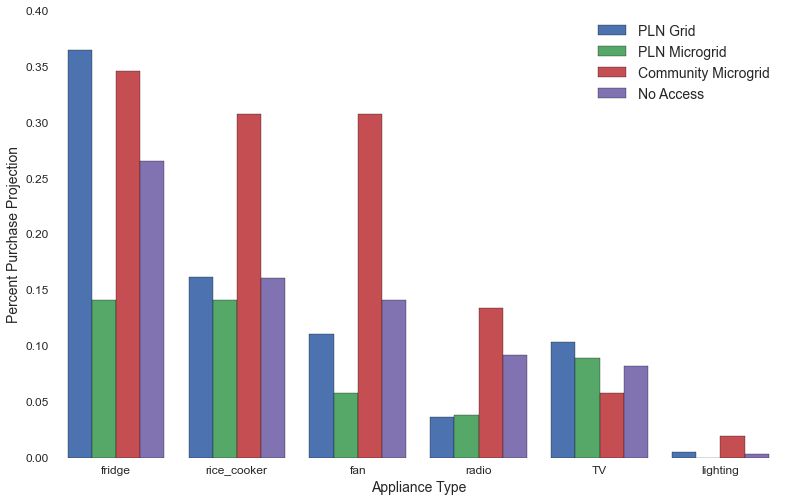

In [20]:
plt.figure(figsize=(13,8))
sns.barplot(x='variable', y='Percent Ownership', hue='access_type',
            hue_order = ['PLN Grid','PLN Microgrid','Community Microgrid','No Access'],
            saturation=5, data=melted)
plt.legend(loc='upper right',prop={'size':14})
plt.xlabel('Appliance Type', fontsize=14)
plt.ylabel('Percent Purchase Projection', fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('Projected_Purchase_graph.pdf')